<a href="https://colab.research.google.com/github/purnasai1499/purnasai_INFO5502_Spring2022/blob/main/Lab_Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets.

# Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [ ]:
### You code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### You code here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/portfolio_data.csv')
df.head(6)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
5,5/8/2013,258.679993,54.385727,112.800003,29.801428


In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [ ]:
pip install keras

In [ ]:
adf = df.drop(['Date', 'AMZN'], axis = 1)
bdf = df['AMZN']

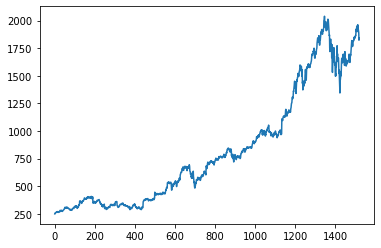

In [ ]:
plt.plot(bdf)

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(adf, bdf, test_size = 0.30, random_state = 0)

lreg = LinearRegression()
lreg.fit(Xtrain, ytrain)
ypre = lreg.predict(Xtest)
print("RMSE:",np.sqrt(mean_squared_error(ytest, ypre)))
print("R2-Score:", r2_score(ytest, ypre))

RMSE: 74.95859000828072
R2-Score: 0.9791550190680726


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(adf, bdf, test_size = 0.3, random_state = 0)

dt_reg = DecisionTreeRegressor()
dt_reg.fit(Xtrain, ytrain)
ypre = dt_reg.predict(Xtest)
print("RMSE:",np.sqrt(mean_squared_error(ytest, ypre)))
print("R2-Score::", r2_score(ytest, ypre))

RMSE: 37.019348236391956
R2-Score:: 0.9949158749822159



Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported.

In [ ]:
### You code here:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pickle
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")
data.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
tweetdata = data[data.label == 1]
tweetdata.head(5)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [ ]:
ntweetdata = data[data.label == 0]
ntweetdata.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words("english")
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['removedtweets'] = data['tweet'].str.replace('[^a-zA-Z0-9 ]', '')
data['removedtweets'] = data['removedtweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wnet_lem = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#lemmatizing the tweets
data['removedtweets'] = data['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="v") for word in row.split()))
data['removedtweets'] = data['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="n") for word in row.split()))
data['removedtweets'] = data['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="a") for word in row.split()))
data['removedtweets'] = data['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="r") for word in row.split()))

In [ ]:
from sklearn.linear_model import LogisticRegression
xy = data['removedtweets']
yz = data['label']

In [ ]:
vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1, 2))
vectorizer = vectorizer.fit(xy)
x_features = vectorizer.transform(xy).toarray()
Xtrain, Xtest, ytrain, ytest = train_test_split(x_features, yz, test_size=0.2)

#LogisticRegression
lreg = LogisticRegression()
model = lreg.fit(Xtrain, ytrain)

In [ ]:
print(x_features.shape)

(31962, 17047)


In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
#lemmatizing the tweets
data1['removedtweets'] = data1['tweet'].str.replace('[^a-zA-Z0-9 ]', '')
data1['removedtweets'] = data1['removedtweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data1['removedtweets'] = data1['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="v") for word in row.split()))
data1['removedtweets'] = data1['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="n") for word in row.split()))
data1['removedtweets'] = data1['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="a") for word in row.split()))
data1['removedtweets'] = data1['removedtweets'].apply(lambda row: " ".join(wnet_lem.lemmatize(word, pos="r") for word in row.split()))

In [ ]:
test_df_ft = vectorizer.transform(data1['removedtweets'])
print(test_df_ft.shape)
test_pred = model.predict(test_df_ft)
print(test_pred)

(17197, 17047)
[0 0 0 ... 0 0 0]


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(ytest, model.predict(Xtest)))

Confusion Matrix:
[[5929   11]
 [ 308  145]]


In [ ]:
print("Classification Report:")
print(classification_report(ytest, model.predict(Xtest)))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5940
           1       0.93      0.32      0.48       453

    accuracy                           0.95      6393
   macro avg       0.94      0.66      0.72      6393
weighted avg       0.95      0.95      0.94      6393

